# **Presentación de la Mentoria Predicción de ausentismo de pacientes en turnos clínicos**

## **Sandra Monica Olariaga**
## **Mentor: Nahuel Almeira**

# Análisis descriptivo

**Importamos librerías y configuración general**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#pd.options.display.max_columns = 30
#pd.options.display.max_rows = 50
import chardet
import string
np.random.seed(0)
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")
import re
import unidecode

In [2]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

**Leemos el dataset**

In [3]:
df = pd.read_csv('dataset_turnos_2019.csv', sep=';')
print(df.shape)
df.tail()

(1194014, 13)


,CentroDeAtencion,Prestador,Recurso,Servicio,FechaDelTurno,EstadoDelTurno,Paciente,Sexo,Edad,PrestacionAsignada,NombreDelCanal,EsSobreTurno,TipoDeTurnoAsignado
1194009,2,-,fa089caaca143ad1ff284640fb4cd2d7,RESONANCIA,2019-12-30 23:30:00,Libre,NaN,,0,NaN,NaN,NO,NaN
1194010,1,OSDE,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:24:00,Atendido,15a7d517fa140ac76f9a7a79de343d81,M,44,ECOGRAFIA COMPLETA DE ABDOMEN,NaN,SI,Práctica
1194011,1,OMINT S. A. DE SERVICIOS,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:27:00,Atendido,2bd3a6fd81b29758aa12a13d210e6fdc,M,53,ECOGRAFIA DE PARTES BLANDAS,NaN,SI,Práctica
1194012,1,SANCOR,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 11:29:00,Atendido,d72ffdcc0121edd182da6a32578e4bb1,F,28,ECOGRAFIA TRANSVAGINAL,NaN,SI,Práctica
1194013,1,MEDIFE ASOCIACIÓN CIVIL,a2073c1d145a1b5fd133f927fbbd7913,RADIOGRAFIA,2019-12-31 14:23:00,Atendido,71f43803027051f252e553746b44820b,M,2,Prestaciones multiples,NaN,SI,Práctica


**Analizamos los tipos de datos de cada campo inferidos por pandas**

In [4]:
df.dtypes

CentroDeAtencion        int64
Prestador              object
Recurso                object
Servicio               object
FechaDelTurno          object
EstadoDelTurno         object
Paciente               object
Sexo                   object
Edad                    int64
PrestacionAsignada     object
NombreDelCanal         object
EsSobreTurno           object
TipoDeTurnoAsignado    object
dtype: object

**Transformar cada campo de acuerdo con su tipo de variable (entero, fecha, string, etc)**

Transformamos el campo **FechaDelTurno** en *datetime*

In [5]:
df.FechaDelTurno = pd.to_datetime(df.FechaDelTurno)

**Visualizamos la cantidad de pacientes por cada centro de atención**

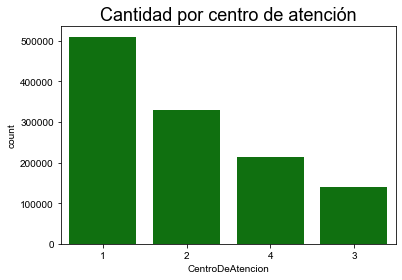

In [6]:
col = 'CentroDeAtencion'
sn.countplot(x=col, data=df, order=df[col].value_counts().index, color= 'green') 
sn.set(font_scale=1.5)
plt.title('Cantidad por centro de atención')
plt.savefig('graficocentrodeatencion', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Visualizamos la cantidad de pacientes por cada prestador**

Cantidad de Prestadores: 71


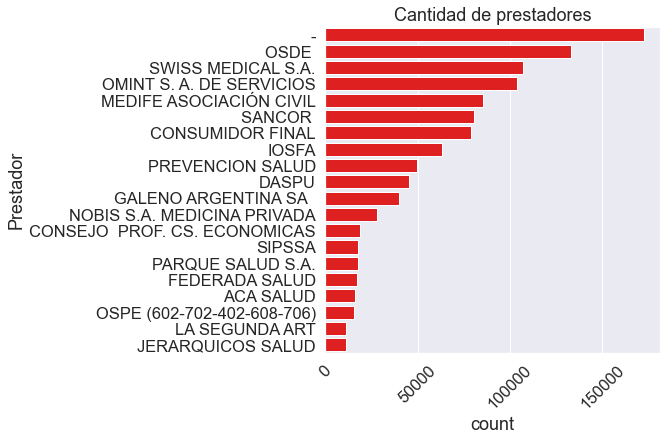

In [7]:
col = 'Prestador'
print('Cantidad de Prestadores:', df[col].unique().size)
fig, ax = plt.subplots(figsize=(6, 6))
sn.countplot(y=col, data=df, order=df[col].value_counts().iloc[:20].index, ax=ax, color='red')
sn.set(font_scale=1.5)
plt.xticks(rotation=45)
plt.title('Cantidad de prestadores')
plt.savefig('graficoprestadores', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Visualizamos la cantidad de pacientes por cada servicio**

Cantidad de servicios: 105


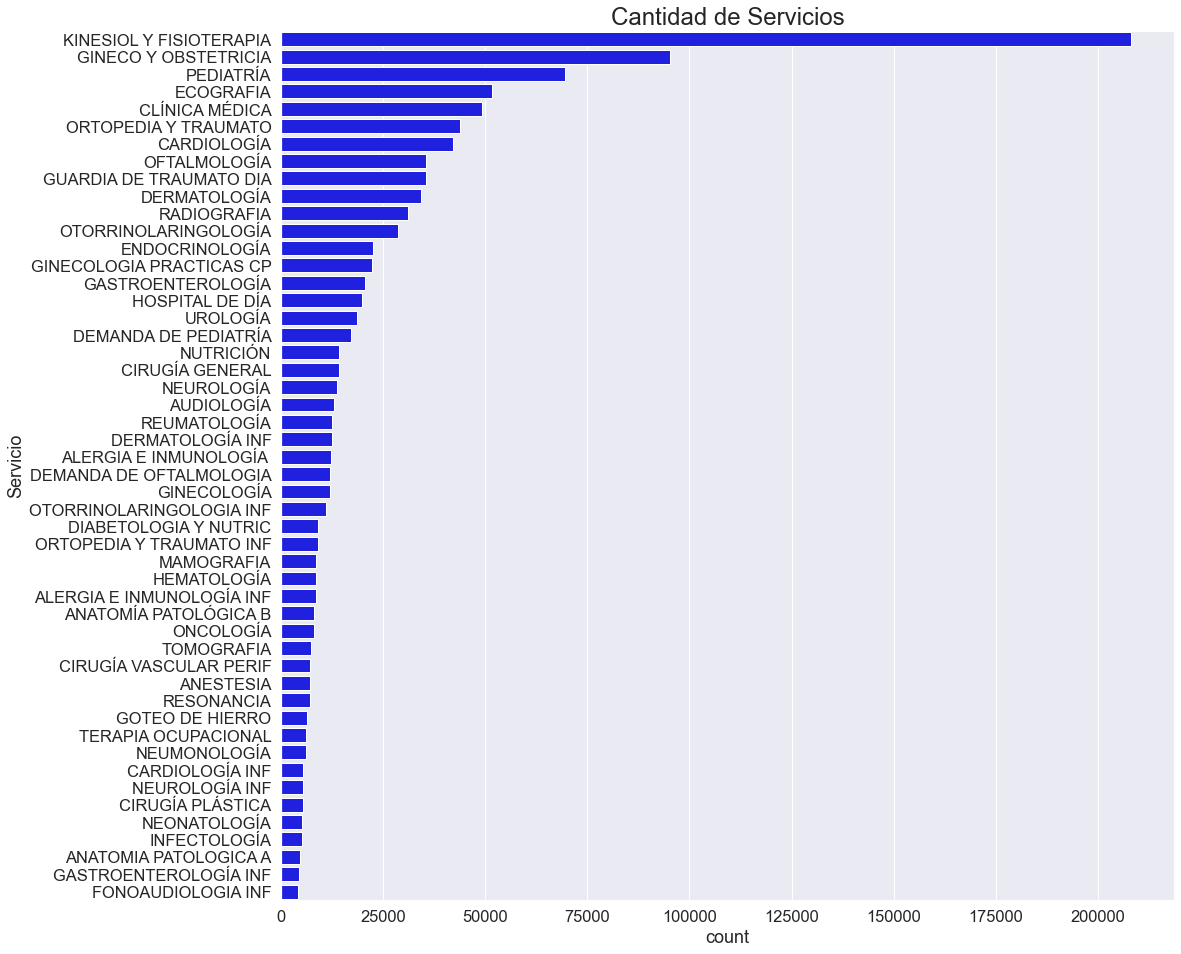

In [8]:
col = 'Servicio'
print('Cantidad de servicios:', df[col].unique().size)
fig, ax = plt.subplots(figsize=(16, 16))
sn.countplot(y=col, data=df, order=df[col].value_counts().iloc[:50].index, ax=ax, color='blue')
sn.set(font_scale=2)
plt.title ('Cantidad de Servicios')
plt.savefig('graficoservicios', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Visualizamos la cantidad de pacientes por estado del turno**

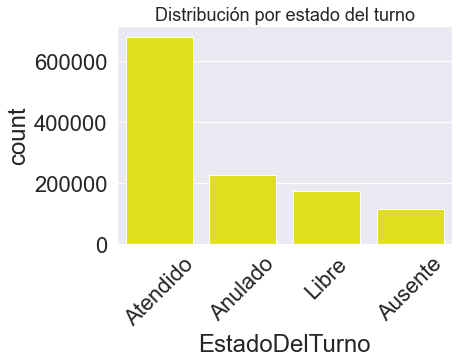

In [9]:
col = 'EstadoDelTurno'
sn.countplot(x=col, data=df, order=df[col].value_counts().index, color ='yellow')
sn.set(font_scale=1.5)
plt.xticks(rotation=45)
plt.title('Distribución por estado del turno')
plt.savefig('graficoestadodelturno', dpi=500, transparent=True, bbox_inches='tight')
plt.show()      

**Visualizamos la cantidad de pacientes según el sexo**

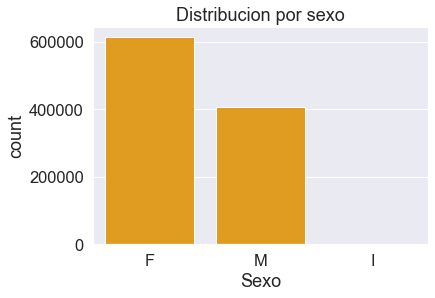

In [10]:
col = 'Sexo'
_df = df[~df.Paciente.isnull()]
sn.countplot(x=col, data=_df, order=_df[col].value_counts().index, color = 'orange')
sn.set(font_scale=1.5)
plt.title('Distribucion por sexo')
plt.savefig('graficosexo', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Visualizamos cantidad de pacientes por tipo de prestaciones** 

Cantidad de prestaciones asignadas: 817


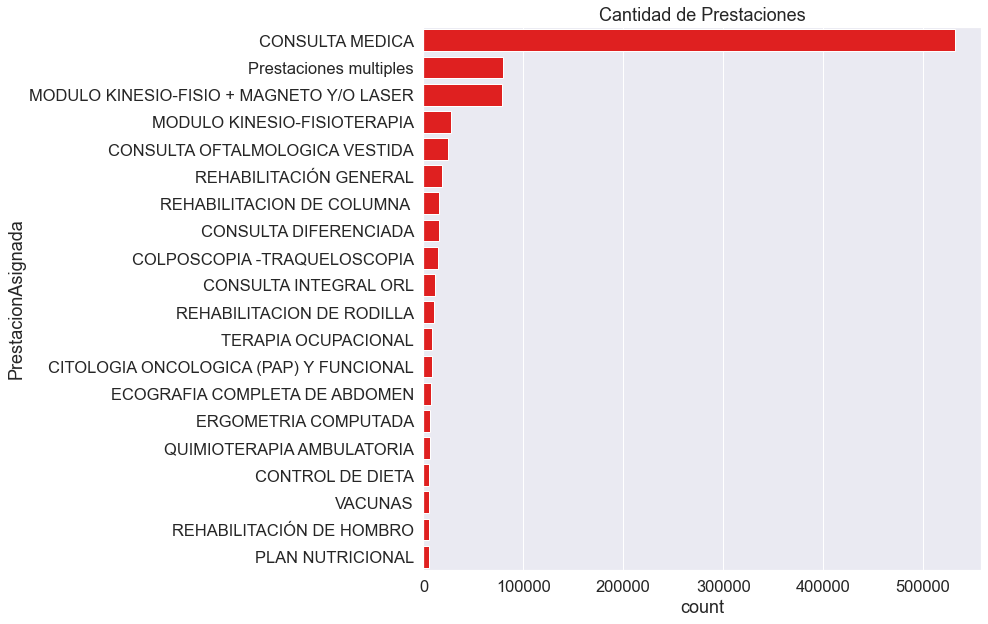

In [11]:
col = 'PrestacionAsignada'
print('Cantidad de prestaciones asignadas:', df[col].unique().size)
fig, ax = plt.subplots(figsize=(10, 10))
sn.countplot(y=col, data=df, order=df[col].value_counts().iloc[:20].index, ax=ax, color='red')
sn.set(font_scale=1.5)
plt.title('Cantidad de Prestaciones')
plt.savefig('graficoprestaciones', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Visualizamos la cantidad de turnos solicitados pora tipo de canal**

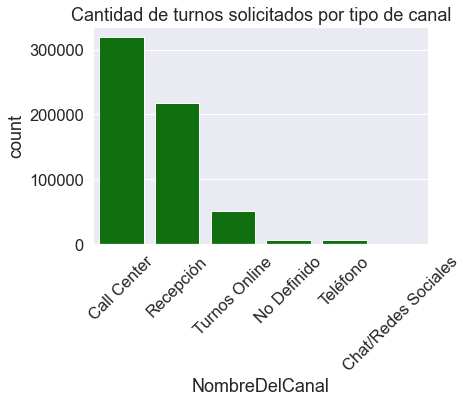

In [12]:
col = 'NombreDelCanal'
sn.countplot(x=col, data=df, order=df[col].value_counts().index, color='green')
sn.set(font_scale=1.5)
plt.xticks(rotation=45)
plt.title('Cantidad de turnos solicitados por tipo de canal')
plt.savefig('graficocanal', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Visualizamos si es o no sobreturno**

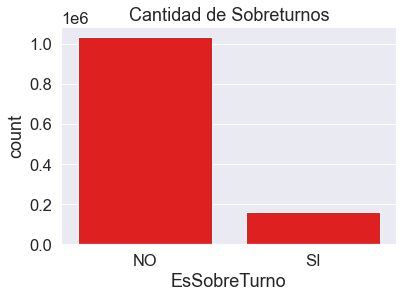

In [13]:
col = 'EsSobreTurno'
sn.countplot(x=col, data=df, order=df[col].value_counts().index, color='red')
sn.set(font_scale=1.5)
plt.title('Cantidad de Sobreturnos')
plt.savefig('graficosobreturno', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Visualizamos la cantidad de pacientes por tipo de turno asignado**

In [14]:
df= df[df.TipoDeTurnoAsignado.isin (['Primera Vez','Práctica', 'Recetas', 'Ulterior / Control'])]

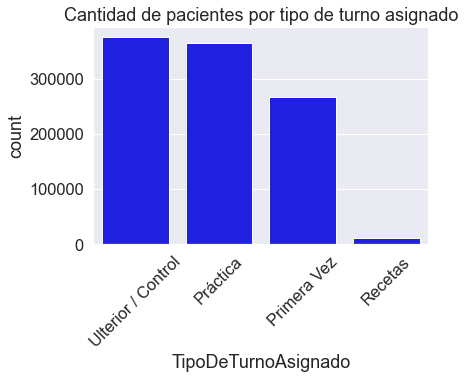

In [15]:
col = 'TipoDeTurnoAsignado'
sn.countplot(x=col, data=df, order=df[col].value_counts().index, color ='blue')
sn.set(font_scale=1.5)
plt.xticks(rotation=45)
plt.title('Cantidad de pacientes por tipo de turno asignado')
plt.savefig('graficotipodeturno', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Visualizamos la distribución de los pacientes por edad**

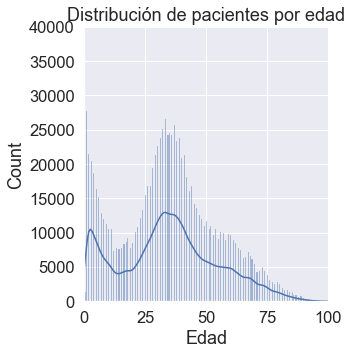

In [16]:
figsize=(16,16)
sn.displot(df.Edad , kde=True)
sn.set(font_scale=1.5)
plt.xlim(0,100)
plt.ylim(0,40000)
plt.title('Distribución de pacientes por edad')
plt.savefig('Distribpacedad', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Calculamos intervalos de Edad**

In [17]:
df_intervalo_edad = pd.cut(df["Edad"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

**Vemos la distribución de los pacientes por sexo y por edad**

In [18]:
pd.crosstab(df_intervalo_edad, df["Sexo"])

Sexo,F,I,M
Edad,,,
"(0, 10]",78210,157,88233
"(10, 20]",43774,84,39780
"(20, 30]",104761,184,53703
"(30, 40]",165735,523,75930
"(40, 50]",89999,64,57418
"(50, 60]",60365,73,38887
"(60, 70]",39776,32,31081
"(70, 80]",21097,31,14884
"(80, 90]",6945,6,4431


**Visualizamos la cantidad de turnos por paciente**

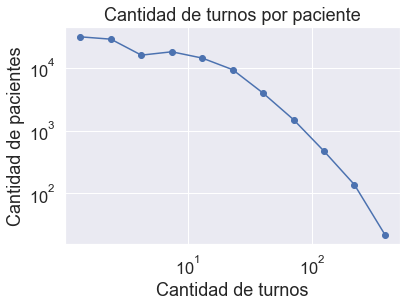

In [19]:
X = df.Paciente[~df.Paciente.isnull()].value_counts().values
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Cantidad de turnos')
ax.set_ylabel('Cantidad de pacientes')
bins = np.logspace(np.log10(X.min()), np.log10(X.max()), 12)
hist, bin_edges = np.histogram(X, bins=bins)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
ax.plot(bin_centers, hist, '-o')
plt.title('Cantidad de turnos por paciente')
plt.show()

**Tabla cruzada entre el estado del turno y el centro de atención**

In [20]:
tabla_cruzada_c = pd.crosstab(df.EstadoDelTurno, df["CentroDeAtencion"])
tabla_cruzada_c

CentroDeAtencion,1,2,3,4
EstadoDelTurno,,,,
Anulado,76436,55934,23264,70173
Atendido,300358,195469,72968,110707
Ausente,47406,36911,16356,12724
Libre,7,0,0,0


**Cantidad de Turnos en el Tiempo**

In [21]:
df['NewDate'] = [d.date() for d in df['FechaDelTurno']]
df['NewTime'] = [d.time() for d in df['FechaDelTurno']]

**Calculamos horarios mas demandados**

In [22]:
print ('Desde: ', min(df.NewTime),'Hasta: ',max(df.NewTime))
moda_NewTime = df.NewTime.mode()
print ('La moda del horario es',moda_NewTime)

Desde:  00:00:00 Hasta:  23:58:00
La moda del horario es 0    10:00:00
dtype: object


**Vemos dia de la semana con mas turnos**

In [23]:
df['DayOfWeek'] = df['FechaDelTurno'].apply(lambda time: time.dayofweek)
df['Month'] = df['FechaDelTurno'].apply(lambda time: time.month)
df['Day'] = df['DayOfWeek'].apply(lambda x: 'Lunes' if x == 0 else 'Martes' if x == 1
                                 else 'Miercoles' if x == 2 else 'Jueves' if x == 3
                                 else 'Viernes' if x== 4 else 'Sabado' if x == 5
                                 else 'Domingo' )
df['Hour'] = df['NewTime'].apply(lambda time: time.hour)

In [24]:
agregation = {'Cantidad de Turnos' : pd.NamedAgg(column ='Day', aggfunc='count')}
df_turnos_por_dia = df.groupby ("Day").agg(**agregation)

**Grafico de cantidad de Turnos por dia de la semana**

Text(0.5, 1.0, 'Cantidad de turnos por dia de la semana')

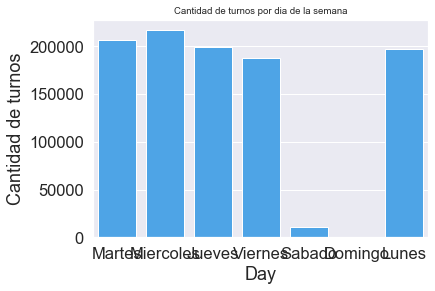

In [25]:
sn.countplot (data=df, x='Day' , color=BLUE)
sn.set(font_scale=0.8)
plt.ylabel('Cantidad de turnos')
plt.title('Cantidad de turnos por dia de la semana')

**Se observa que la cantidad de turnos de Lunes a Viernes es uniforme**

In [26]:
df_ausentes = df.EstadoDelTurno=='Ausente'
df_turnos_ausentes = df[df_ausentes]

**Grafico de la cantidad de turnos ausentes por dia de la semana**

Text(0.5, 1.0, 'Cantidad de turnos ausentes por dia de la semana')

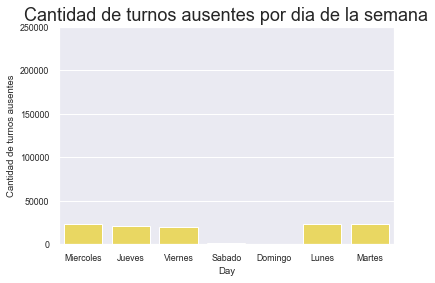

In [27]:
sn.countplot (data=df_turnos_ausentes, x='Day' , color =YELLOW)
sn.set(font_scale=1.5)
plt.ylabel('Cantidad de turnos ausentes')
plt.ylim(0,250000)
plt.title('Cantidad de turnos ausentes por dia de la semana')

**Se observa que la cantidad de turnos ausentes de Lunes a Viernes es uniforme**

**Grafico comparativo de la media de turnos por dia de la semana y por hora**

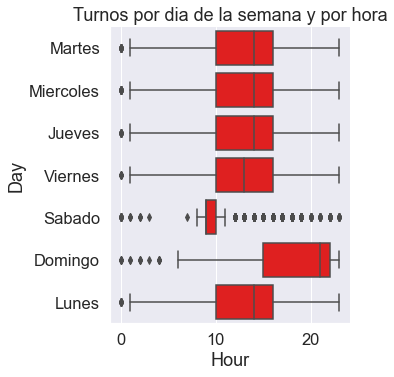

In [28]:
sn.catplot(x='Hour', y='Day' , data=df , kind='box', color='red')
sn.set(font_scale=1.5)
plt.title('Turnos por dia de la semana y por hora')
plt.savefig('graficoturnospordiayhora', dpi=500, transparent=True, bbox_inches='tight')

**Se observa que la media de cantidad de turnos por dia hábil de la semana y por hora es uniforme**

**Moda de la hora**

In [29]:
moda=df['Hour'].mode()
print ('La Moda de la hora es',moda)

La Moda de la hora es 0    10
dtype: int64


**El horario mas demandado es 10 hs**

**Relación entre los intervalos de edad y el tipo de turno asignado**

In [30]:
tablaedad= pd.crosstab(df_intervalo_edad, df["TipoDeTurnoAsignado"])

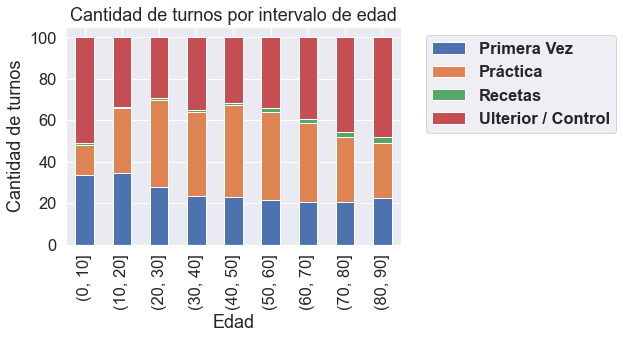

In [31]:
figsize=(15,10)
plot = pd.crosstab(df_intervalo_edad,df.TipoDeTurnoAsignado).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked=True)
font = {'weight' : 'bold',
           'size'   : 22}
plt.rc('font', **font)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylabel('Cantidad de turnos')
plt.title('Cantidad de turnos por intervalo de edad')
plt.savefig('graficoturnosporedad', dpi=500, transparent=True, bbox_inches='tight')

**Como evoluciona la cantidad de turnos y la cantidad de ausencias a lo largo del año ? Existe alguna tendencia ?**

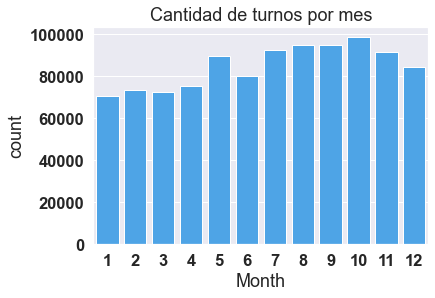

In [32]:
sn.countplot (data=df, x='Month' , color=BLUE)
plt.title ('Cantidad de turnos por mes')
plt.savefig('graficoturnospormes', dpi=500, transparent=True, bbox_inches='tight')

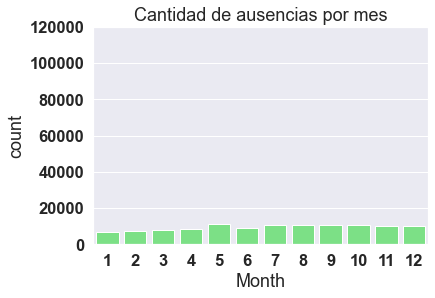

In [33]:
sn.countplot (data=df_turnos_ausentes, x='Month' , color=GREEN)
plt.ylim(0,120000)
plt.title('Cantidad de ausencias por mes')
plt.savefig('graficoausenciaspormes', dpi=500, transparent=True, bbox_inches='tight')

**La cantidad de turnos y de ausencias a lo largo del año es uniforme**

# Analisis y Curación de datos

In [34]:
dfp = pd.read_csv('turnos_con_paciente_2018-2019_despersonalizado.csv', sep=';')
dfsp = pd.read_csv('turnos_sin_paciente_2018-2019_despersonalizado.csv', sep=';')

**Renombramos las columnas para que no tengan espacios en el nombre del dataframe sin pacientes**

In [35]:
## Renombramos columnas
to_rename = {
    'Centro de atención': 'CentroDeAtencion',
    'Prestación asignada': 'Prestacion',
    'Estado del turno': 'EstadoDelTurno',
    'Nombre del canal': 'Canal',
    'Fecha del turno': 'FechaDelTurno',
    'Hora del turno': 'HoraDelTurno',
    'Es sobre turno': 'EsSobreTurno',
    'Tipo de turno asignado': 'TipoDeTurno'
        }
dfsp_r = dfsp.rename(columns=to_rename)

**Seteamos los campos de fechas del dataframe sin pacientes**

In [36]:
## Parseamos fechas
dfsp_r.FechaDelTurno = dfsp_r.FechaDelTurno + ' ' + dfsp_r.HoraDelTurno
dfsp_r.FechaDelTurno = pd.to_datetime(dfsp_r.FechaDelTurno)
dfsp_r = dfsp_r.drop(columns=['HoraDelTurno'])

**Renombramos las columnas para que no tengan espacios en el nombre del dataframe con pacientes**

In [37]:
## Renombramos columnas
to_rename = {
    'CentroAtencion_Nombre': 'CentroDeAtencion',
    'Servicio_Nombre': 'Servicio',
    'TurnoEstado_Nombre': 'EstadoDelTurno',
    'FechaTurno': 'FechaDelTurno',
    'TipoTurno': 'TipoDeTurno',
    'Dirección (localidad)' : 'Localidad',
    'Dirección (provincia)' : 'Provincia',
    'FechaOtrogado' : 'FechaOtorgado'
    }
dfp_r = dfp.rename(columns=to_rename)

**Seteamos los campos de fechas del dataframe con pacientes**

In [38]:
## Parseamos fechas
dfp_r.FechaDelTurno = pd.to_datetime(dfp_r.FechaDelTurno)

**Corregimos cuestiones realcionadas a la forma diferente de escribir una misma palabra**

In [39]:
##Hacemos minúscula todo
dfp_r.Localidad = dfp_r.Localidad.str.lower()
dfp_r.Provincia = dfp_r.Provincia.str.lower()

In [40]:
dfp_r.Localidad.replace(['-', ' '], 'No definido', inplace=True)
dfp_r.loc[dfp_r.Localidad.isnull(), 'Localidad'] = 'No definido'
dfp_r.Provincia.replace(['-', ' '], 'No definido', inplace=True)
dfp_r.loc[dfp_r.Provincia.isnull(), 'Provincia'] = 'No definido'

In [41]:
##Reemplazamos todos los _Córdoba_ mal escritos (ya revisados) por "cordoba"
Mal_Escrito = ['cba', 'cordiba', 'cordo', 'cordobacapital', 'cordobacapitral', 'cordonba', 'corodba', 'crdoba', 'ordoba']
dfp_r.Localidad.replace(Mal_Escrito,'cordoba', inplace=True)
dfp_r.Provincia.replace(Mal_Escrito,'cordoba', inplace=True)

In [42]:
#Localidad
##Evaluamos y reemplazamos los que tenemos dudas (ya revisados), por "cordoba" 
Duda = ['capital', 'centro']
dfp_r.loc[(dfp_r.Provincia == 'cordoba') & (dfp_r.Localidad.isin(Duda)), 'Localidad'] = 'cordoba'

In [43]:
#Provincia
##Reemplazamos los posibles "nodefinido" por "cordoba" en Provincia, cuando Localidad='cordoba'
dfp_r.loc[dfp_r.Localidad == 'cordoba', 'Provincia'] = 'cordoba'

In [44]:
##Reemplazamos todo lo que no es "cordoba" por "otro"
dfp_r.loc[(dfp_r.Provincia != 'cordoba') , 'Provincia'] = 'otro'
dfp_r.loc[(dfp_r.Provincia == 'nodefinido'), 'Provincia'] = 'otro'
dfp_r.loc[(dfp_r.Localidad != 'cordoba') , 'Localidad'] = 'otro'
dfp_r.loc[(dfp_r.Localidad == 'nodefinido'), 'Localidad'] = 'otro'

**Dejamos solo dos valores posibles del Estado del turno Atendido o Ausentes**

In [45]:
dfp_r.EstadoDelTurno= dfp_r.EstadoDelTurno.replace ({'Atendiendo' :'Atendido','Asignado':'Atendido','Receptado':'Atendido'})

In [46]:
dfsp_r_t= dfsp_r[dfsp_r.EstadoDelTurno.isin (['Atendido','Ausente'])]

**Unimos los dos dataframes el sin pacientes y el con pacientes**

In [47]:
cols = [
    'CentroDeAtencion', 'Servicio', 'Recurso', 'FechaDelTurno', 
    'EstadoDelTurno', 'Prestacion', 'TipoDeTurno'
]
df = dfp_r.merge(dfsp_r_t, on=cols)

**Unificamos el canal como telefono en el caso de telefono y call center**

In [48]:
df.loc[(df.Canal == 'Teléfono'), 'Canal'] = 'Telefono'

In [49]:
df.loc[(df.Canal == 'Call Center'), 'Canal'] = 'Telefono'

**Borramos los registros que tienen NaN**

In [50]:
df.dropna( inplace=True )

**Dejamos solo los valores F y M para sexo**

In [51]:
df_1= df[df.Sexo.isin (['F','M'])]

In [52]:
df_1.HC = df_1.HC.astype(int)

**Dejamos solo las edades de 18 a 99 años**

In [53]:
df_1 = df_1.drop(df_1[df_1['Edad'] < 18].index)

In [54]:
df_1 = df_1.drop(df_1[df_1['Edad'] > 100].index)

**Calculamos la diferencia de dias entre la fecha en que se solicito el turno y la fecha efectiva del turno**

In [55]:
df_1['FechaOtorgado'] = pd.to_datetime(df.FechaOtorgado)

In [56]:
df_1['FechaDiaDelTurno'] = [d.date() for d in df_1['FechaDelTurno']]
df_1['HoraTurno'] = [d.time() for d in df_1['FechaDelTurno']]

In [57]:
df_1['FechaDiaOtorgado'] = [d.date() for d in df_1['FechaOtorgado']]
df_1['HoraOtorgado'] = [d.time() for d in df_1['FechaOtorgado']]

In [58]:
df_1['DifDias'] = df_1.FechaDiaDelTurno - df_1.FechaDiaOtorgado

In [59]:
x=pd.Timedelta(0,'d')

**Calculamos la anticipación de la reserva**

In [60]:
df_1['AnticipacionDeReserva'] = 1

In [61]:
df_1.loc[(df_1.DifDias == x ), 'AnticipacionDeReserva'] = 0

**Agregamos una columna con los nombres de los días de la semana**

In [62]:
df_1['DiaTurno'] = df_1['FechaDelTurno'].apply(lambda time: time.dayofweek)
df_1['MesTurno'] = df_1['FechaDelTurno'].apply(lambda time: time.month)
df_1['DiaTurnoNombre'] = df_1['DiaTurno'].apply(lambda x: 'Lunes' if x == 0 else 'Martes' if x == 1
                                 else 'Miercoles' if x == 2 else 'Jueves' if x == 3
                                 else 'Viernes' if x== 4 else 'Sabado' if x == 5
                                 else 'Domingo' )

**Quitamos los días Domingo**

In [63]:
df_1 = df_1.drop(df_1[df_1['DiaTurnoNombre'] == 'Domingo'].index)

**Quitamos los servicios pediatricos**

In [64]:
for i in ['REUMATOLOGÍA INF','ENDOCRINOLOGÍA INF',
          'DERMATOLOGÍA INF', 'DIABETOLOGIA Y NUTRIC INF',
          'NEUMONOLOGÍA INF', 'NEFROLOGÍA INF', 'ALERGIA E INMUNOLOGÍA INF',
          'ORTOPEDIA Y TRAUMATO INF','DIABETOLOGIA Y NUTRIC INF',
          'OTORRINOLARINGOLOGIA INF','NEUROLOGÍA INF', 
          'HEMATOLOGÍA INF', 'NUTRICIÓN INFANTIL',
          'CARDIOLOGÍA INF', 'GASTROENTEROLOGÍA INF'
          'DEMANDA DE GASTRO INF', 'INFECTOLOGÍA INF'
          'PSICOLOGÍA INF', 'CIRUGÍA PLÁSTICA INF',
          'CIRUGÍA GENERAL INF', 'UROLOGÍA INF','DEMANDA DE GASTRO INF',
          'FONOAUDIOLOGIA INF', 'NEUROCIRUGÍA INF', 'DEMANDA DE NEUROLOGIA INF',
          'GUARDIA DE TRAUMATO DIA', 'PSICOLOGÍA INF', 'CUIDADOS PALIATIVOS INF',
          'OTORRINOLARINGOLOGIA INF', 'DEMANDA DE PEDIATRÍA', 'INFECTOLOGÍA INF' ,'CUENTAS PROPIAS ALERGIA E INMUNOLOGIA INF',
          'PEDIATRÍA', 'DEMANDA DE ORL INF', 'GASTROENTEROLOGÍA INF', 'TERAPIA OCUPACIONAL INF',
          'GUARDIA DE PEDIATRIA', 'CHEQUEO PEDIATRICO']:
    df_1 = df_1.drop(df_1[df_1['Servicio'] == i].index)

**Quitamos los centros de atención 5 y 6**

In [65]:
df_1 = df_1.drop(df_1[df_1['CentroDeAtencion'] == 5].index)

In [66]:
df_1 = df_1.drop(df_1[df_1['CentroDeAtencion'] == 6].index)

**Dejamos 0 si el servicio no es Consulta Medica y 1 si lo es**

In [67]:
df_1['ConsultaMedica'] = 0

In [68]:
df_1.loc[(df_1.Prestacion== 'CONSULTA MEDICA' ), 'ConsultaMedica'] = 1

**Dejamos 0 si es particular (Consumidor Final) o 1 si es obra social**

In [69]:
df_1['ConsumidorFinal'] = 0

In [70]:
df_1.loc[(df_1.Prestador == 'CONSUMIDOR FINAL' ), 'ConsumidorFinal'] = 1

In [71]:
df_1['TipoDeTurnoEncode'] = df_1['TipoDeTurno'].apply(lambda x: 1 if x == 'Práctica' else 2 if x == 'Primera Vez'
                                 else  3 if x == 'Ulterior / Control' else 4 if x == 'DNP'
                                 else 5 )

**Dejamos 0 si el turno fue atendido y 1 si fue Ausente**

In [72]:
df_1['EstadoDelTurnoEncode'] = 0

In [73]:
df_1.loc[(df_1.EstadoDelTurno == 'Ausente' ), 'EstadoDelTurnoEncode'] = 1

**Sexo es 0 si es M o 1 si es F**

In [74]:
df_1['SexoEncode'] = 0

In [75]:
df_1.loc[(df_1.Sexo == 'F' ), 'SexoEncode'] = 1

In [76]:
df_1.loc[(df_1.Sexo == 'M' ), 'SexoEncode'] = 0

**Si es SobreTurno queda 0 y 1 en caso contrario**

In [77]:
df_1['STEncode'] = 0

In [78]:
df_1.loc[(df_1.EsSobreTurno == 'NO' ), 'STEncode'] = 1

**Leemos los dataset climaticos**

In [79]:
df_clima2018 = pd.read_csv('clima_2018.csv')
df_clima2019 = pd.read_csv('clima_2019.csv')

In [80]:
df_clima = pd.concat([df_clima2018, df_clima2019], ignore_index=True, sort=False)

**Renombramos las columnas del dataset climatico**

In [81]:
to_rename = {
    'Fecha' : 'FechaDiaDelTurno' ,
    'Hr.Med(%)': 'HrMedPorcentaje',
    'Prec.(mm)': 'PrecipMM',
    'Pres.n. mar(Hp)': 'PresionHp',
    'TdMed(C)': 'TempMedCentigrados',
    'Dir.': 'Direccion',
    'Rch.': 'Rch',
    'Vel.': 'Vel',
            }
df_clima_r = df_clima.rename(columns=to_rename)

**Quitamos las columnas que no consideramos relevantes**

In [82]:
df_clima_r = df_clima_r.drop(['HrMedPorcentaje', 'NubTotOct', 'NubbajOct', 'PresionHp', 
             'TempMedCentigrados', 'Tmax', 'Tmed', 'Tmin', 'Direccion', 
             'Rch', 'Vel', 'VisKm'], axis=1)

**Colocamos el tipo de dato correcto en la fecha del turno**

In [83]:
df_clima_r['FechaDiaDelTurno'] = pd.to_datetime(df_clima_r.FechaDiaDelTurno)

In [84]:
df_1['FechaDiaDelTurno'] = pd.to_datetime(df_1.FechaDiaDelTurno)

**Unimos el dataset del clima con el dataset de los pacientes**

In [85]:
df_1_1= df_clima_r.merge(df_1, on=['FechaDiaDelTurno'])

In [86]:
dataset = df_1_1.select_dtypes(include=[np.number])

**Cambiamos el tipo de dato del campo diferencia de dias**

In [87]:
dataset['DifDias']= dataset['DifDias']/ np.timedelta64(1, 'D')

In [88]:
dataset.insert(0,'EstadoDelTurno',dataset.EstadoDelTurnoEncode)

**Quitamos los campos Estado del turno Encode, DifDias y STEncode**

In [89]:
dataset = dataset.drop(columns=['EstadoDelTurnoEncode'])

In [90]:
HC_1= dataset.HC

In [91]:
dataset = dataset.drop(columns=['DifDias'])

In [92]:
dataset = dataset.drop(columns=['HC'])

In [93]:
dataset = dataset.drop(columns=['STEncode'])

In [94]:
duplicados=  dataset[dataset.duplicated(keep=False)]

In [95]:
dataset.drop_duplicates(inplace=True)

In [96]:
duplicados= dataset[dataset.duplicated(keep=False)]

In [97]:
duplicados.sort_values(by=['EstadoDelTurno', 'CentroDeAtencion', 'Recurso', 'Edad',
       'AnticipacionDeReserva', 'DiaTurno', 'MesTurno', 'ConsultaMedica',
       'ConsumidorFinal', 'TipoDeTurnoEncode', 'SexoEncode'])

,EstadoDelTurno,CentroDeAtencion,Recurso,Edad,AnticipacionDeReserva,DiaTurno,MesTurno,ConsultaMedica,ConsumidorFinal,TipoDeTurnoEncode,SexoEncode


In [98]:
dataset.drop_duplicates(inplace=True)

# Librerias para modelos de aprendizaje 

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, plot_roc_curve
%matplotlib inline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as s
from sklearn.linear_model import SGDClassifier
import collections
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [99]:
import scipy.stats as stats 
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
import seaborn as s
import xgboost as xgb
from IPython.display import display_html
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.inspection import permutation_importance
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Separación en conjunto de entrenamiento y conjunto de prueba

In [100]:
X, y = dataset.iloc[:, 1:], dataset.EstadoDelTurno

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Chequeamos cuantos valores 0 (atendidos) y 1 (Ausentes) hay en y**

In [102]:
y.value_counts()

0    370033
1    103925
Name: EstadoDelTurno, dtype: int64

# Entrenamos los diferentes modelos

# Modelo lineal Regresion Logistica

**Usamos el parametro class_weight = balanced para tratar de mitigar el desbalanceo de las clases**

In [103]:
model = LogisticRegression (C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=1, solver='newton-cg')

In [104]:
y_train_pred=model.predict(X_train)

In [105]:
y_test_pred = model.predict(X_test)

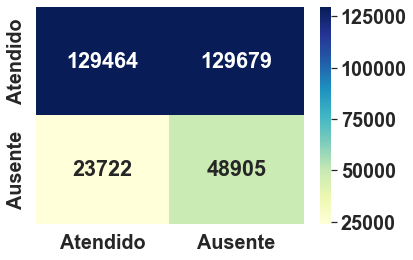

In [106]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainregresion', dpi=500, transparent=True, bbox_inches='tight', )

In [107]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.50      0.63    259143
           1       0.27      0.67      0.39     72627

    accuracy                           0.54    331770
   macro avg       0.56      0.59      0.51    331770
weighted avg       0.72      0.54      0.58    331770



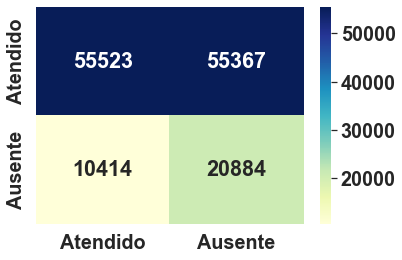

In [108]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestregresion', dpi=500, transparent=True, bbox_inches='tight')

In [109]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63    110890
           1       0.27      0.67      0.39     31298

    accuracy                           0.54    142188
   macro avg       0.56      0.58      0.51    142188
weighted avg       0.72      0.54      0.58    142188



**El modelo lineal de Regresión Logistica se equivoca en reconocer las dos clases**

# Usamos MinMaxScaler para la Regresion Logistica

In [110]:
scaler = MinMaxScaler()

In [111]:
transf_ds = scaler.fit_transform(dataset.iloc[:, :12])

In [112]:
transf_ds = pd.DataFrame(transf_ds)

In [113]:
X, y = transf_ds.iloc[:, 1:], transf_ds.iloc[:,0]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [115]:
model = LogisticRegression(class_weight='balanced', random_state=0, solver='sag')

In [116]:
model.fit(X_train, y_train)

In [117]:
y_train_pred=model.predict(X_train)

In [118]:
y_test_pred = model.predict(X_test)

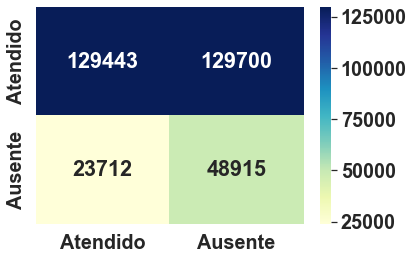

In [119]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainregresionscaler', dpi=500, transparent=True, bbox_inches='tight')

In [120]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.50      0.63    259143
         1.0       0.27      0.67      0.39     72627

    accuracy                           0.54    331770
   macro avg       0.56      0.59      0.51    331770
weighted avg       0.72      0.54      0.58    331770



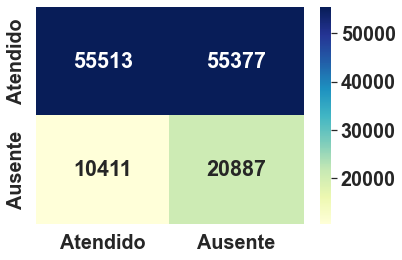

In [121]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestregresionscaler', dpi=500, transparent=True, bbox_inches='tight')

In [122]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.50      0.63    110890
         1.0       0.27      0.67      0.39     31298

    accuracy                           0.54    142188
   macro avg       0.56      0.58      0.51    142188
weighted avg       0.72      0.54      0.58    142188



**EL scaler permite que se reconozca parcialmente la clase 1 pero empeora el reconocimiento de la clase 0**

# Usamos SGD Classifier

In [123]:
X, y = dataset.iloc[:, 1:], dataset.EstadoDelTurno

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [125]:
model = SGDClassifier(loss = 'log' , random_state=0)

In [126]:
model.fit(X_train, y_train)

In [127]:
y_train_pred=model.predict(X_train)

In [128]:
y_test_pred = model.predict(X_test)

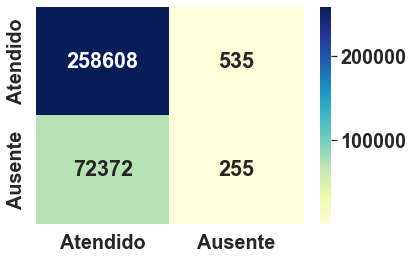

In [129]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainSGD', dpi=500, transparent=True, bbox_inches='tight')

In [130]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    259143
           1       0.32      0.00      0.01     72627

    accuracy                           0.78    331770
   macro avg       0.55      0.50      0.44    331770
weighted avg       0.68      0.78      0.69    331770



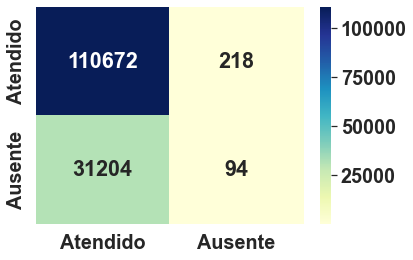

In [131]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestSGD', dpi=500, transparent=True, bbox_inches='tight')

In [132]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    110890
           1       0.30      0.00      0.01     31298

    accuracy                           0.78    142188
   macro avg       0.54      0.50      0.44    142188
weighted avg       0.67      0.78      0.68    142188



**El SGDClassifier reconoce con mucho error la clase 1**

# Usamos MinMAxScaler para SGD Classifier

In [133]:
scaler = MinMaxScaler()

In [134]:
transf_ds = scaler.fit_transform(dataset.iloc[:, :12])

In [135]:
transf_ds = pd.DataFrame(transf_ds)

In [136]:
X, y = transf_ds.iloc[:, 1:], transf_ds.iloc[:,0]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [138]:
model = SGDClassifier(loss = 'log', power_t = 0.7, random_state=42)

In [139]:
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [140]:
y_train_pred=model.predict(X_train)

In [141]:
y_test_pred = model.predict(X_test)

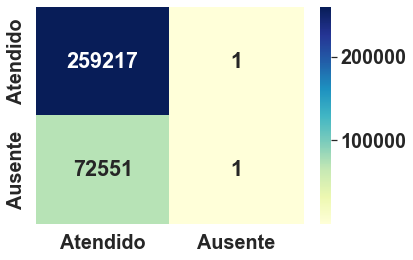

In [142]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainSGDscaler', dpi=500, transparent=True, bbox_inches='tight')

In [143]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88    259218
         1.0       0.50      0.00      0.00     72552

    accuracy                           0.78    331770
   macro avg       0.64      0.50      0.44    331770
weighted avg       0.72      0.78      0.69    331770



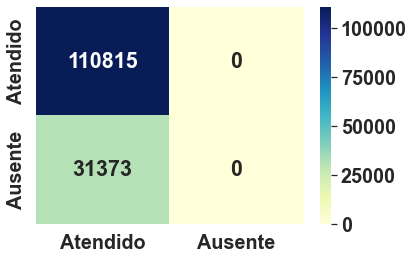

In [144]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestSGDscaler', dpi=500, transparent=True, bbox_inches='tight')

In [145]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88    110815
         1.0       0.00      0.00      0.00     31373

    accuracy                           0.78    142188
   macro avg       0.39      0.50      0.44    142188
weighted avg       0.61      0.78      0.68    142188



**El scaler produce que no se reconozca la clase 1**

# Clasificador Polinomial

In [146]:
X, y = dataset.iloc[:, 1:], dataset.EstadoDelTurno

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [148]:
model = make_pipeline(
    PolynomialFeatures(degree= 3, interaction_only=False, include_bias=True),
    LogisticRegression()
)
model.fit(X_train, y_train);

In [149]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

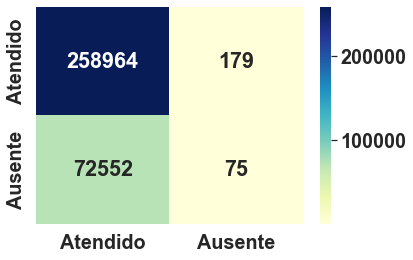

In [150]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainclasfpoli', dpi=500, transparent=True, bbox_inches='tight')

In [151]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    259143
           1       0.30      0.00      0.00     72627

    accuracy                           0.78    331770
   macro avg       0.54      0.50      0.44    331770
weighted avg       0.67      0.78      0.69    331770



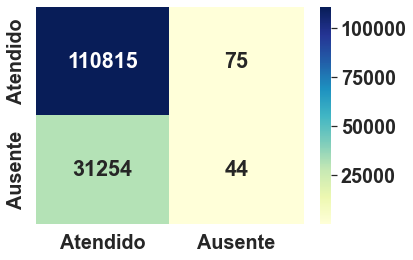

In [152]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestclasfpoli', dpi=500, transparent=True, bbox_inches='tight')

In [153]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    110890
           1       0.37      0.00      0.00     31298

    accuracy                           0.78    142188
   macro avg       0.57      0.50      0.44    142188
weighted avg       0.69      0.78      0.68    142188



**El clasificador polinomial casi no reconoce la clase 1**

# Usamos MinMaxScaler para el Classificador Polinomial

In [154]:
scaler = MinMaxScaler()

In [155]:
transf_ds = scaler.fit_transform(dataset.iloc[:, :12])

In [156]:
transf_ds = pd.DataFrame(transf_ds)

In [157]:
X, y = transf_ds.iloc[:, 1:], transf_ds.iloc[:,0]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [159]:
model = make_pipeline(
    PolynomialFeatures(degree= 4, interaction_only=False, include_bias=True),
    LogisticRegression()
)

In [160]:
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

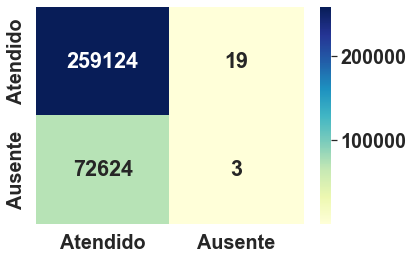

In [161]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainclasfpoliscaler', dpi=500, transparent=True, bbox_inches='tight')

In [162]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88    259143
         1.0       0.14      0.00      0.00     72627

    accuracy                           0.78    331770
   macro avg       0.46      0.50      0.44    331770
weighted avg       0.64      0.78      0.69    331770



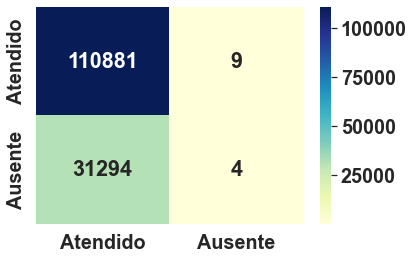

In [163]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestclasfpoliscaler', dpi=500, transparent=True, bbox_inches='tight')

In [164]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88    110890
         1.0       0.31      0.00      0.00     31298

    accuracy                           0.78    142188
   macro avg       0.54      0.50      0.44    142188
weighted avg       0.68      0.78      0.68    142188



**El scaler no mejora para nada el reconocimiento de la clase 1**

# Decision Tree Classifier

In [165]:
X, y = dataset.iloc[:, 1:], dataset.EstadoDelTurno

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [167]:
clf = DecisionTreeClassifier(max_depth=20, criterion='gini', random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [168]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [169]:
accuracy_score(y_test,y_test_pred)

0.7454637522153769

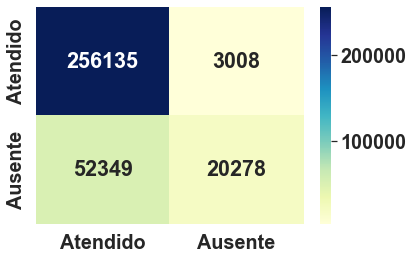

In [170]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainDTC', dpi=500, transparent=True, bbox_inches='tight')

In [171]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90    259143
           1       0.87      0.28      0.42     72627

    accuracy                           0.83    331770
   macro avg       0.85      0.63      0.66    331770
weighted avg       0.84      0.83      0.80    331770



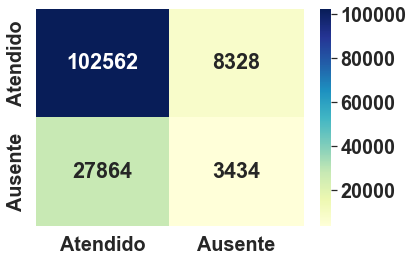

In [172]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestDTC', dpi=500, transparent=True, bbox_inches='tight')

In [173]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85    110890
           1       0.29      0.11      0.16     31298

    accuracy                           0.75    142188
   macro avg       0.54      0.52      0.50    142188
weighted avg       0.68      0.75      0.70    142188



**Decision Tree Classifier reconoce las dos clases pero con errores**

# Random Forest

In [174]:
X, y = dataset.iloc[:, 1:], dataset.EstadoDelTurno

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [176]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

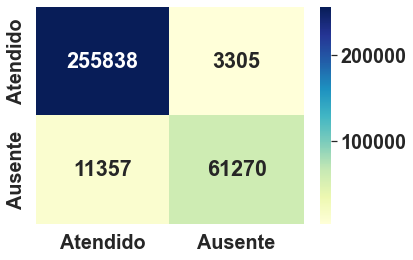

In [177]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainrandomforest', dpi=500, transparent=True, bbox_inches='tight')

In [178]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    259143
           1       0.95      0.84      0.89     72627

    accuracy                           0.96    331770
   macro avg       0.95      0.92      0.93    331770
weighted avg       0.96      0.96      0.95    331770



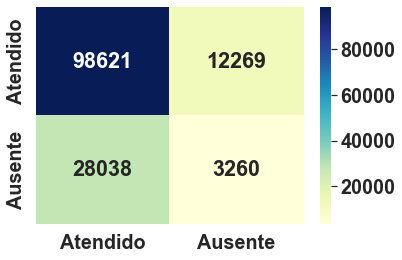

In [179]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestrandomforest', dpi=500, transparent=True, bbox_inches='tight')

In [180]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83    110890
           1       0.21      0.10      0.14     31298

    accuracy                           0.72    142188
   macro avg       0.49      0.50      0.48    142188
weighted avg       0.65      0.72      0.68    142188



**Random Forest comete error en el reconocimiento de las dos clases**

# Aprendizaje Supervisado

# Particionamos los conjuntos de entrenamiento y de test

In [181]:
X, y = dataset.iloc[:, 1:], dataset.EstadoDelTurno

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Random Forest con GridSearchCV

In [183]:
rf_param = {  'criterion':['gini'], 
              'min_samples_leaf':[1],
              'min_samples_split':[2,3],
              'random_state': [0],
              'n_estimators': [100,150],
              'class_weight': ['balanced', 'balanced_subsample']
            }
model_rf = RandomForestClassifier()
rf_clf = GridSearchCV(model_rf, rf_param, cv=3, scoring='accuracy',n_jobs=-1, verbose = 4)
rf_clf.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 14.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 14.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150], 'random_state': [0]},
             scoring='accuracy', verbose=4)

In [184]:
best_rf_clf = rf_clf.best_estimator_
bestpar = rf_clf.best_params_

print('Mejor Modelo\n', best_rf_clf)
print('Mejores Parametros\n', bestpar)
print('Best Random Forest accuracy: ', rf_clf.best_score_)

Mejor Modelo
 RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=0)
Mejores Parametros
 {'class_weight': 'balanced', 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 0}
Best Random Forest accuracy:  0.7299394158603852


In [185]:
y_train_pred = rf_clf.predict(X_train)

In [186]:
y_test_pred = rf_clf.predict(X_test)

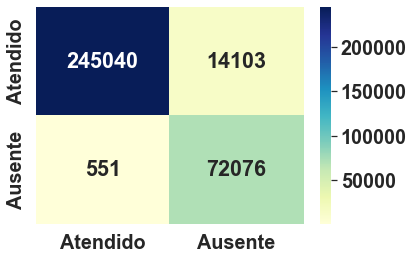

In [187]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainRFGridsearchCV', dpi=500, transparent=True, bbox_inches='tight')

In [188]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    259143
           1       0.84      0.99      0.91     72627

    accuracy                           0.96    331770
   macro avg       0.92      0.97      0.94    331770
weighted avg       0.96      0.96      0.96    331770



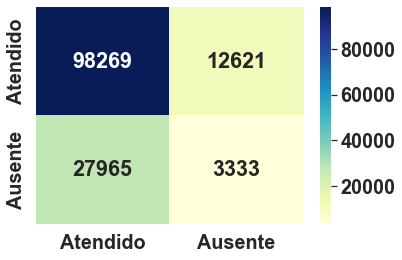

In [189]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestRFGridsearchCV', dpi=500, transparent=True, bbox_inches='tight')

In [190]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83    110890
           1       0.21      0.11      0.14     31298

    accuracy                           0.71    142188
   macro avg       0.49      0.50      0.48    142188
weighted avg       0.65      0.71      0.68    142188



**Random Forest con GridSearchCV no cambia mucho los resultados en el reconocimiento de cada clase**

# BayesSearchCV

In [191]:
model_rf = RandomForestClassifier()
search_space = {"bootstrap": Categorical([True, False]), # values for boostrap can be either True or False
        "max_depth": Integer(6, 20), # values of max_depth are integers from 6 to 20
        "max_features": Categorical(['auto', 'sqrt','log2']), 
        "min_samples_leaf": Integer(2, 10),
        "min_samples_split": Integer(2, 10),
        "n_estimators": Integer(100, 500)
    }

def on_step(optim_result):
    """
    Callback meant to view scores after
    each iteration while performing Bayesian
    Optimization in Skopt"""
    score = forest_bayes_search.best_score_
    print("best score: %s" % score)
    if score >= 0.85:
        print('Interrupting!')
        return True

forest_bayes_search = BayesSearchCV(model_rf, search_space, n_iter=3, # specify how many iterations
                                    scoring="accuracy", n_jobs=-1, cv=3, verbose= 4)

forest_bayes_search.fit(X_train, y_train, callback=on_step) # callback=on_step will print score after each iteration

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.3min finished


best score: 0.7853844530849685
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.2s finished


best score: 0.7853844530849685
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.5s finished


best score: 0.7853844530849685


BayesSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=3, n_jobs=-1,
              scoring='accuracy',
              search_spaces={'bootstrap': Categorical(categories=(True, False), prior=None),
                             'max_depth': Integer(low=6, high=20, prior='uniform', transform='identity'),
                             'max_features': Categorical(categories=('auto', 'sqrt', 'log2'), prior=None),
                             'min_samples_leaf': Integer(low=2, high=10, prior='uniform', transform='identity'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='identity'),
                             'n_estimators': Integer(low=100, high=500, prior='uniform', transform='identity')},
              verbose=4)

In [192]:
forest_bayes_search.best_params_

OrderedDict([('bootstrap', False),
             ('max_depth', 16),
             ('max_features', 'sqrt'),
             ('min_samples_leaf', 5),
             ('min_samples_split', 10),
             ('n_estimators', 339)])

In [193]:
forest_bayes_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=16, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=339)

In [194]:
forest_bayes_search.best_score_

0.7853844530849685

In [195]:
y_train_pred=forest_bayes_search.predict(X_train)

In [196]:
y_test_pred=forest_bayes_search.predict(X_test)

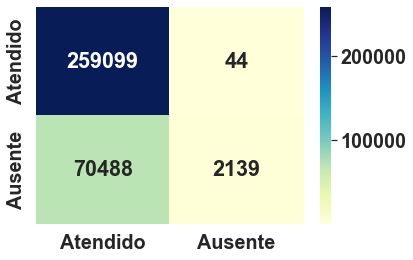

In [197]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainBayesSearch', dpi=500, transparent=True, bbox_inches='tight')

In [198]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    259143
           1       0.98      0.03      0.06     72627

    accuracy                           0.79    331770
   macro avg       0.88      0.51      0.47    331770
weighted avg       0.83      0.79      0.70    331770



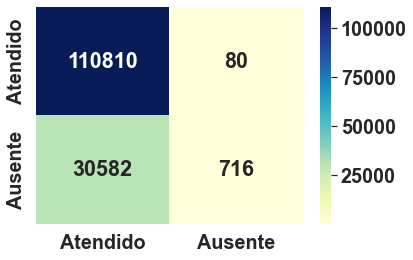

In [199]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestBayesSearch', dpi=500, transparent=True, bbox_inches='tight')

In [200]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    110890
           1       0.90      0.02      0.04     31298

    accuracy                           0.78    142188
   macro avg       0.84      0.51      0.46    142188
weighted avg       0.81      0.78      0.69    142188



**Bayes SearchCV cometer error en el reconocimiento de la clase 1**

# Modelo Boosting with xgboost

In [201]:
clf = xgb.XGBClassifier(objective ='binary:logistic', booster ='gbtree', learning_rate = 0.1,
                          max_depth = 10, alpha = 5, n_estimators = 50, cv=3, scoring='accuracy',n_jobs=-1, verbose = 3)

In [202]:
clf.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='auc',
        verbose=True) 

[16:37:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { cv, scoring, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.63818	validation_1-auc:0.63341
[1]	validation_0-auc:0.64145	validation_1-auc:0.63658
[2]	validation_0-auc:0.64447	validation_1-auc:0.63941
[3]	validation_0-auc:0.64543	validation_1-auc:0.63979
[4]	validation_0-auc:0.64609	validation_1-auc:0.64051
[5]	validation_0-auc:0.64720	validation_1-auc:0.64116
[6]	validation_0-auc:0.64787	validation_1-auc:0.64123
[7]	validation_0-auc:0.64893	validation_1-auc:0.64172
[8]	validation_0-auc:0.64949	validation_1-auc:0.64207
[9]	validation_0-auc:0.65071	validation_1-auc:0.64284
[10]	validation_0-auc:0.65185	validation_1-auc:0.64366
[11]	va

XGBClassifier(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, cv=3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=5, reg_lambda=1, scale_pos_weight=1, scoring='accuracy',
              subsample=1, tree_method='exact', validate_parameters=1,
              verbose=3, verbosity=None)

In [203]:
y_pred = clf.predict(X)

In [204]:
acc_score = accuracy_score(y, y_pred)

In [205]:
print('Boosting accuracy: ', acc_score)

Boosting accuracy:  0.7876330814122771


In [206]:
y_train_pred = clf.predict(X_train)

In [207]:
y_test_pred = clf.predict(X_test)

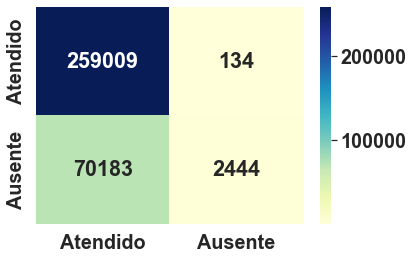

In [208]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainBoosting', dpi=500, transparent=True, bbox_inches='tight')

In [209]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    259143
           1       0.95      0.03      0.06     72627

    accuracy                           0.79    331770
   macro avg       0.87      0.52      0.47    331770
weighted avg       0.82      0.79      0.70    331770



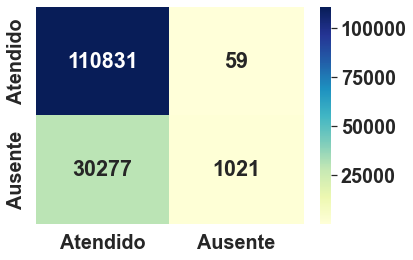

In [210]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestBoosting', dpi=500, transparent=True, bbox_inches='tight')

In [211]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    110890
           1       0.95      0.03      0.06     31298

    accuracy                           0.79    142188
   macro avg       0.87      0.52      0.47    142188
weighted avg       0.82      0.79      0.70    142188



**Boosting con xgboost sigue equivocandose en reconocer la clase 1**

# Modelo Linear SVC

In [212]:
svc = make_pipeline(StandardScaler(), LinearSVC (loss = 'hinge', multi_class = 'crammer_singer', class_weight = 'balanced' , random_state=42 ))

In [213]:
svc.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(class_weight='balanced', loss='hinge',
                           multi_class='crammer_singer', random_state=42))])

In [214]:
predictions = svc.predict(X_test)
print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y.size)*100))

Accuracy: 15 


In [215]:
y_train_pred = svc.predict(X_train)

In [216]:
y_test_pred = svc.predict(X_test)

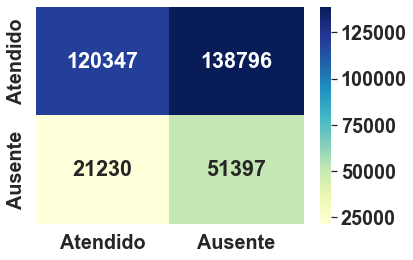

In [217]:
cm_train=confusion_matrix(y_train, y_train_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_train, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctrainLinearSVC', dpi=500, transparent=True, bbox_inches='tight')

In [218]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.46      0.60    259143
           1       0.27      0.71      0.39     72627

    accuracy                           0.52    331770
   macro avg       0.56      0.59      0.50    331770
weighted avg       0.72      0.52      0.55    331770



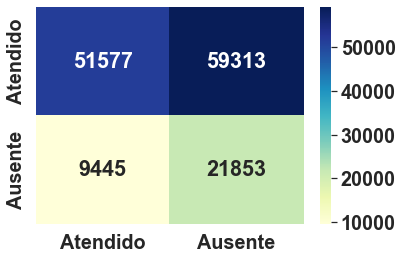

In [219]:
cm_test=confusion_matrix(y_test, y_test_pred)
s.set(font_scale=1.8)
plt.yticks(va='center')
x_axis_labels = ['Atendido','Ausente']
y_axis_labels = ['Atendido','Ausente']
s.heatmap(cm_test, annot=True ,cmap="YlGnBu", fmt="d" , xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('mctestLinearSVC', dpi=500, transparent=True, bbox_inches='tight')

In [220]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.47      0.60    110890
           1       0.27      0.70      0.39     31298

    accuracy                           0.52    142188
   macro avg       0.56      0.58      0.49    142188
weighted avg       0.72      0.52      0.55    142188



**Modelo Liear SVC se equivoca mucho en el reconocimento de las dos clases**

# Aprendizaje No supervisado

# Librerias

In [99]:
from sklearn import (manifold, decomposition)
import time
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.cluster import KMeans,MeanShift,estimate_bandwidth
from sklearn import decomposition
import seaborn as sn
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

**Agregamos HC para tener una forma de individualizar cada registro**

In [100]:
dataset.insert(11,'HC',HC_1)

# Visualizacion-con-embeddings:tSNE

In [101]:
df = dataset.copy()

In [102]:
df_ausentes=dataset.copy()
df_noausentes=dataset.copy()

In [103]:
df_ausentes = df_ausentes.drop(df_ausentes[df_ausentes['EstadoDelTurno'] == 0].index)

In [104]:
df_noausentes = df_noausentes.drop(df_noausentes[df_noausentes['EstadoDelTurno'] == 1].index)

**Calculamos la dimensión del espacio de los datos**

In [107]:
n_sne=20000 #elegir numero pequeño para agilidad en el cálculo luego
df_sne=df.loc[:n_sne]

In [108]:
n_sne_a=20000 #elegir numero pequeño para agilidad en el cálculo luego
df_sne_a=df_ausentes.loc[:n_sne_a]

X_a=df_sne_a
print('dimensión del espacio de los datos: ', len(X_a))

dimensión del espacio de los datos:  3351


In [109]:
n_sne_na=20000 #elegir numero pequeño para agilidad en el cálculo luego
df_sne_na=df_noausentes.loc[:n_sne_na]

X_na=df_sne_na
print('dimensión del espacio de los datos: ', len(X_na))

dimensión del espacio de los datos:  14944


In [110]:
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)  # Numero de componentes para t-SNE = 2
X_tsne_a = tsne.fit_transform(X_a)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3351 samples in 0.022s...
[t-SNE] Computed neighbors for 3351 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3351
[t-SNE] Computed conditional probabilities for sample 2000 / 3351
[t-SNE] Computed conditional probabilities for sample 3000 / 3351
[t-SNE] Computed conditional probabilities for sample 3351 / 3351
[t-SNE] Mean sigma: 35.527959
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.942661
[t-SNE] KL divergence after 1000 iterations: 0.374989
t-SNE done! Time elapsed: 24.679200172424316 seconds


In [111]:
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)  # Numero de componentes para t-SNE = 2
X_tsne_na = tsne.fit_transform(X_na)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14944 samples in 0.089s...
[t-SNE] Computed neighbors for 14944 samples in 0.306s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14944
[t-SNE] Computed conditional probabilities for sample 2000 / 14944
[t-SNE] Computed conditional probabilities for sample 3000 / 14944
[t-SNE] Computed conditional probabilities for sample 4000 / 14944
[t-SNE] Computed conditional probabilities for sample 5000 / 14944
[t-SNE] Computed conditional probabilities for sample 6000 / 14944
[t-SNE] Computed conditional probabilities for sample 7000 / 14944
[t-SNE] Computed conditional probabilities for sample 8000 / 14944
[t-SNE] Computed conditional probabilities for sample 9000 / 14944
[t-SNE] Computed conditional probabilities for sample 10000 / 14944
[t-SNE] Computed conditional probabilities for sample 11000 / 14944
[t-SNE] Computed conditional probabilities for sample 12000 / 14944
[t-SNE] Computed conditional probabilities for sam

**Graficamos los datos en el espacio transformado**

In [112]:
data=[]
#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne_a[:,0], y=X_tsne_a[:,1],
                           mode='markers',
                        text=df_sne.loc[:,'EstadoDelTurno'], 
                           marker=dict(
                                size=10, color= 'blue')
                           )
graf2 =go.Scatter(x=X_tsne_na[:,0], y=X_tsne_na[:,1],
                      text=df_sne.loc[:,'EstadoDelTurno'],
                      textfont=dict(family='sans serif',size=30,color='red'),
                      opacity=0.9,mode='text')
data=[graf1,graf2]
layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)
fig = go.Figure(data=data, layout=layout)
plot(fig)

'temp-plot.html'

**Podemos visualizar los turnos ausentes en azul y los atendidos en rojo**

# Componentes-Principales 

In [113]:
n_acp=20000
df_acp=df.loc[:n_acp] 

In [114]:
X=df_acp
print('los datos tienen dimesión n= ',len(X))

los datos tienen dimesión n=  18295


**Estandarizamos**

In [115]:
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X) # numpyarray normalizado por columna

**Elegimos 4 componentes**

In [116]:
pca=decomposition.PCA(n_components=4) #elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())
pcaratio = pca.explained_variance_ratio_
X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [0.16000915 0.13802951 0.10365158 0.09191035]
proporción de varianza por componente acumulada:  [0.16000915 0.29803865 0.40169023 0.49360058]
tamaño de los datos:  (18295, 4)


In [117]:
componentes=[0,1,2,3]

**Graficamos las componentes principales vs la varianza**

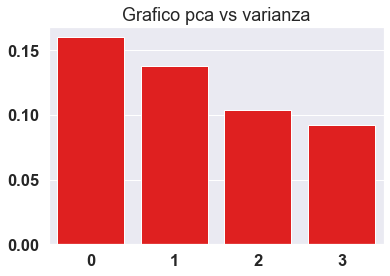

In [118]:
sn.barplot(x=componentes, y=pcaratio, color='red')
plt.title('Grafico pca vs varianza')
plt.savefig('graficopacvsvarianza', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Graficamos las primeras dos componentes**

In [119]:
pcs=pca.components_
#Graph 1
data=[]
for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=X.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=20))
    data.append(graph)
layout = go.Layout(title="Ausentismo",titlefont=dict(size=30),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)
fig = go.Figure(data=data, layout=layout)
plot(fig)

'temp-plot.html'

**Graficamos las segundas dos componentes**

In [121]:
pcs=pca.components_
#Graph 2
data=[]
for i, (x,y) in enumerate(zip(pcs[2,:],pcs[3,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=X.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=20))
    data.append(graph)
layout = go.Layout(title="Ausentismo",titlefont=dict(size=30),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)
fig = go.Figure(data=data, layout=layout)
plot(fig)

'temp-plot.html'

# Clustering

**Normalizamos los datos**

In [122]:
X=df_acp # Datos sin estandarizar
X_scaled=std_scale.transform(X) # normalizar 

**Fijamos el numero de clusters en 6**

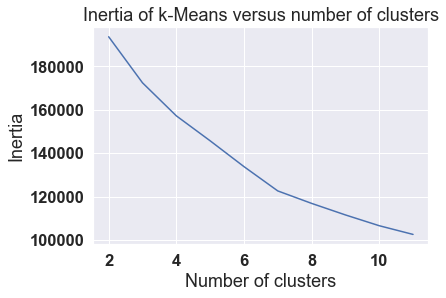

In [123]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(X_scaled).inertia_ for i in range(10)]
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.savefig('graficocodo', dpi=500, transparent=True, bbox_inches='tight')

In [124]:
# Número de clusters buscado
n_clust = 6
km = KMeans(n_clusters=n_clust, random_state= 0)
km.fit(X_scaled)
# Recuperacion de etiquetas
clusters = km.labels_
print('Etiquetas de los  Cluster: ', clusters)
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Etiquetas de los  Cluster:  [1 1 4 ... 5 4 4]
Suma de los cuadrados de las distancias al cluster / Inertia:  135596.23725646955


# Silhouette

El análisis de silueta se puede utilizar para estudiar la distancia de separación entre los grupos resultantes. El gráfico de silueta muestra una medida de qué tan cerca está cada punto en un grupo de puntos en los grupos vecinos y, por lo tanto, proporciona una forma de evaluar parámetros como el número de grupos visualmente
Los coeficientes de silueta (como se denominan estos valores) cercanos a +1 indican que la muestra está lejos de los conglomerados vecinos. Un valor de 0 indica que la muestra está en o muy cerca del límite de decisión entre dos conglomerados vecinos y los valores negativos indican que esas muestras podrían haber sido asignadas al conglomerado incorrecto.

For n_clusters = 2 The average silhouette_score is : 0.7740521813509283
For n_clusters = 3 The average silhouette_score is : 0.5483891538332956
For n_clusters = 4 The average silhouette_score is : 0.611538048062943
For n_clusters = 5 The average silhouette_score is : 0.6201712603190755
For n_clusters = 6 The average silhouette_score is : 0.5849696402946227


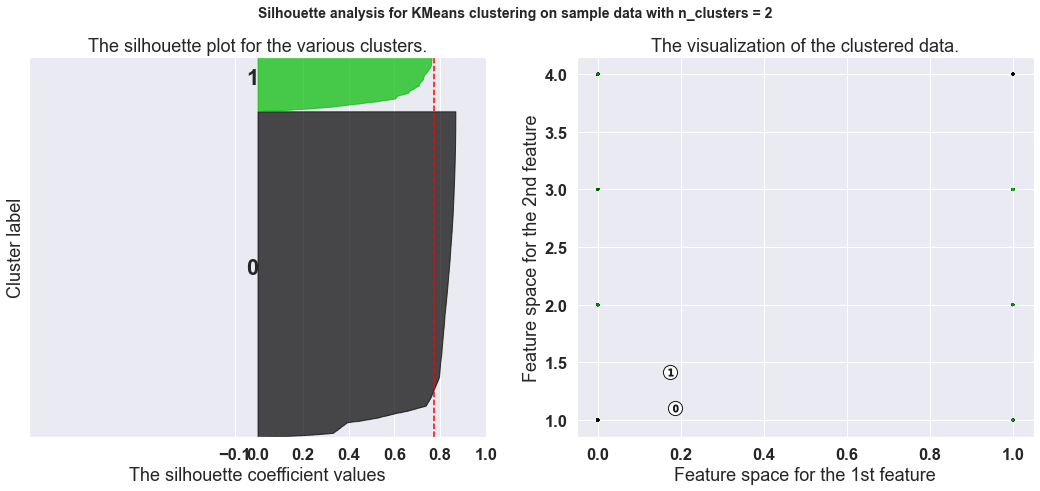

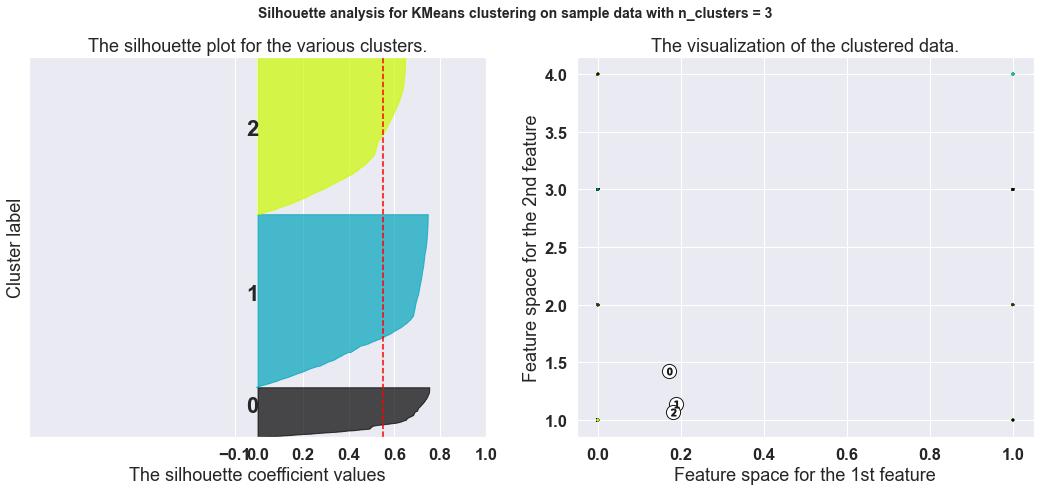

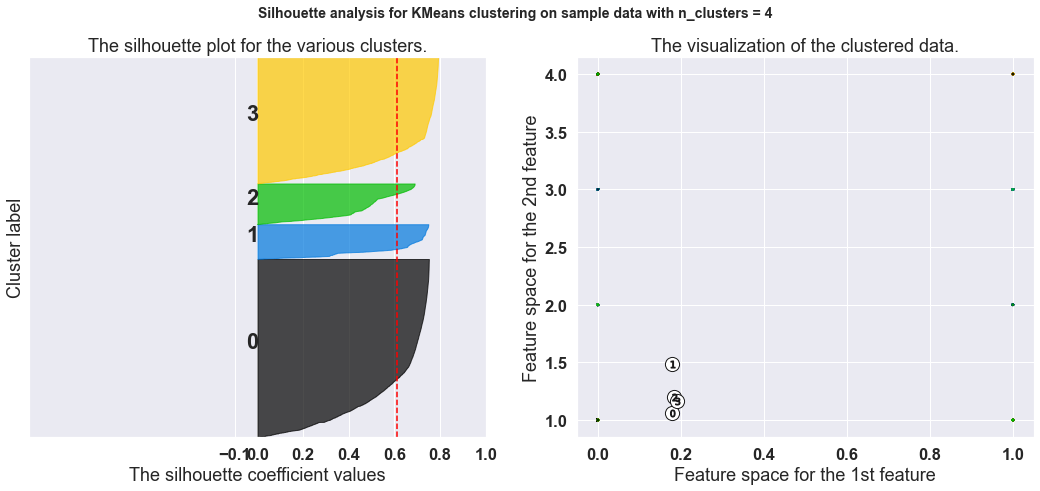

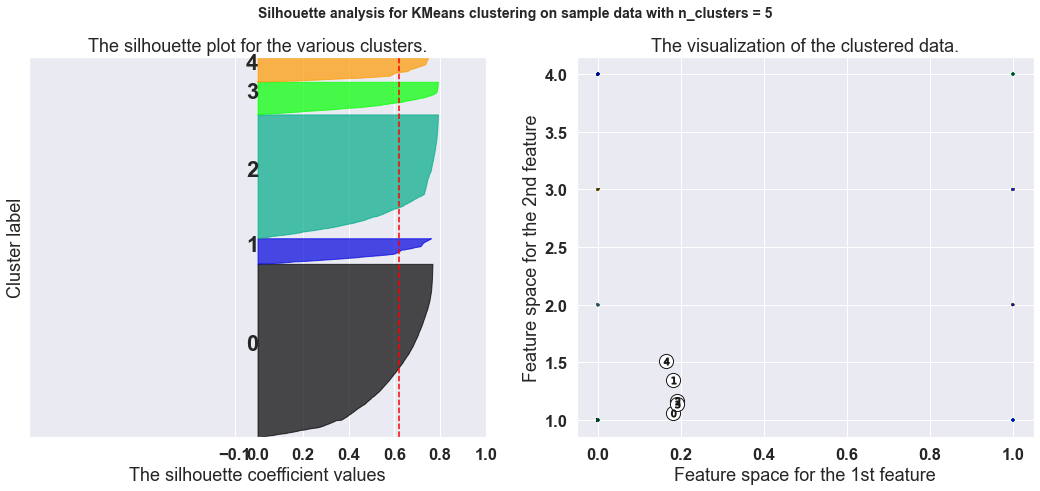

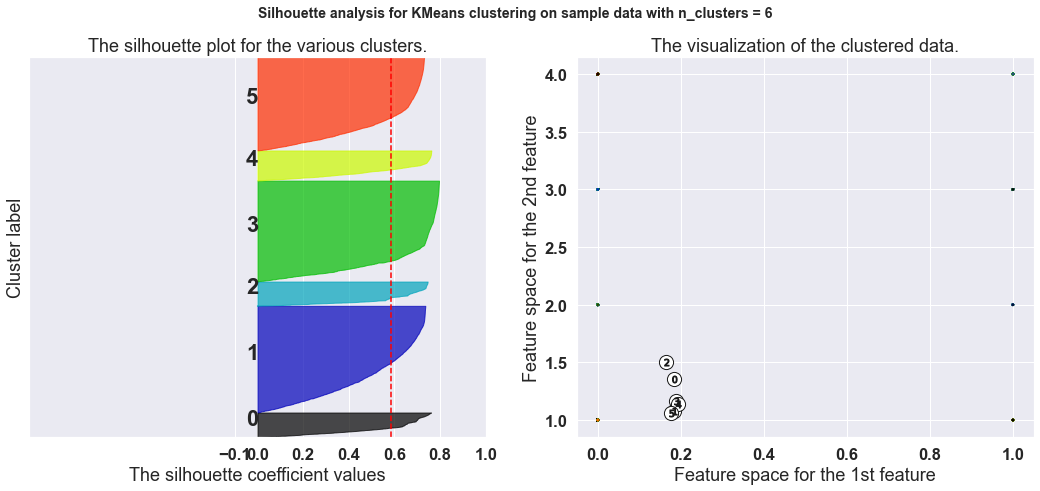

In [125]:
range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ax1.set_ylim([0, len(df_acp) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10 )
    cluster_labels = clusterer.fit_predict(df_acp)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_acp, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_acp, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_acp.iloc[:, 0], df_acp.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.savefig('graficoSilhouette', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Elegimos clusters = 6 que es donde mejor estan distribuidos**

In [126]:
df_clusters=df_acp.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_) + 1 , 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  6 clusters, nosotros forzamos la cantidad


In [127]:
df_clusters[['HC','kmeans']].groupby('kmeans').agg(['count'])

,HC
,count
kmeans,
0,2710
1,2512
2,540
3,2877
4,8611
5,1045


**Exploramos cada uno de los clusters buscando alguna agrupación**

In [128]:
df_clusters.loc[(df_clusters.kmeans==0)].sample(15)
# aparentemente consumidor final 0 centro de atención 1, 2 y 3

,EstadoDelTurno,CentroDeAtencion,Recurso,Edad,AnticipacionDeReserva,DiaTurno,MesTurno,ConsultaMedica,ConsumidorFinal,TipoDeTurnoEncode,SexoEncode,HC,kmeans
4277,0,1,394,43,1,0,10,1,0,3,1,60295,0
4931,0,1,494,20,1,3,11,1,1,3,0,71597,0
3613,0,2,189,61,1,0,10,0,0,1,1,74413,0
3068,0,3,245,53,1,2,8,1,0,3,0,28232,0
5271,0,2,242,20,1,3,11,0,0,2,1,101260,0
3548,0,1,263,33,1,0,10,1,0,2,1,32261,0
4815,0,1,70,62,1,3,11,1,0,3,1,41255,0
4018,0,3,158,34,1,0,10,1,0,3,1,31846,0
3499,0,1,208,41,1,0,10,1,0,2,1,18893,0
5877,1,1,307,43,1,5,12,1,0,2,1,54751,0


In [129]:
df_clusters.loc[(df_clusters.kmeans==0)][['CentroDeAtencion','ConsumidorFinal']].groupby(['CentroDeAtencion']).agg(['count'])

,ConsumidorFinal
,count
CentroDeAtencion,
1,2173
2,103
3,434


In [130]:
df_clusters.loc[(df_clusters.kmeans==1)].sample(15)
# aparentemente consumidor final mayoría 1 centro de atención 1, 2

,EstadoDelTurno,CentroDeAtencion,Recurso,Edad,AnticipacionDeReserva,DiaTurno,MesTurno,ConsultaMedica,ConsumidorFinal,TipoDeTurnoEncode,SexoEncode,HC,kmeans
9054,0,1,179,49,1,3,1,0,0,1,1,9325,1
11030,0,1,274,24,1,1,1,0,0,1,0,18009,1
8457,0,1,145,30,1,3,1,0,0,1,1,1422,1
19239,0,1,333,75,1,4,3,0,1,3,1,19416,1
19948,0,1,227,49,1,2,5,0,0,3,1,41305,1
7436,0,1,316,48,1,1,1,0,0,1,0,12954,1
12773,0,1,274,42,1,3,1,0,0,1,1,20139,1
16430,0,1,117,57,1,2,1,0,0,3,1,18391,1
9213,0,1,116,34,1,4,1,0,0,3,1,16524,1
9254,0,1,405,32,1,4,1,0,0,1,0,16574,1


In [131]:
df_clusters.loc[(df_clusters.kmeans==1)][['CentroDeAtencion','ConsumidorFinal']].groupby(['CentroDeAtencion']).agg(['count'])

,ConsumidorFinal
,count
CentroDeAtencion,
1,2499
2,12
3,1


In [132]:
df_clusters.loc[(df_clusters.kmeans==2)].sample(15)
# aparentmente consumidor final 0 Centro de Atencion 3,4

,EstadoDelTurno,CentroDeAtencion,Recurso,Edad,AnticipacionDeReserva,DiaTurno,MesTurno,ConsultaMedica,ConsumidorFinal,TipoDeTurnoEncode,SexoEncode,HC,kmeans
9916,0,4,506,40,1,5,1,0,0,1,0,8089,2
15648,0,4,213,33,1,1,1,0,0,1,1,3257,2
3036,0,3,101,47,1,2,8,0,0,1,1,60500,2
18032,0,4,506,43,1,4,2,0,0,1,1,8438,2
3747,0,3,511,26,1,0,10,0,0,1,1,26306,2
15142,0,4,506,45,0,1,1,0,0,2,1,185,2
5743,0,3,515,34,1,3,11,0,1,1,1,5478,2
4243,0,3,511,38,1,0,10,0,0,1,1,37949,2
9169,0,4,506,41,0,4,1,0,0,1,0,13052,2
12092,0,4,506,34,1,2,1,0,0,1,0,10289,2


In [133]:
df_clusters.loc[(df_clusters.kmeans==2)][['CentroDeAtencion','ConsumidorFinal']].groupby(['CentroDeAtencion']).agg(['count'])

,ConsumidorFinal
,count
CentroDeAtencion,
3,62
4,478


In [134]:
df_clusters.loc[(df_clusters.kmeans==3)].sample(15)
# aparentmente consumidor final 0 centro de atención 1 

,EstadoDelTurno,CentroDeAtencion,Recurso,Edad,AnticipacionDeReserva,DiaTurno,MesTurno,ConsultaMedica,ConsumidorFinal,TipoDeTurnoEncode,SexoEncode,HC,kmeans
15067,1,1,207,42,1,0,1,1,0,3,1,18511,3
10301,1,1,528,30,1,0,1,1,0,2,1,7373,3
3217,1,1,219,32,1,2,8,0,0,1,1,27076,3
585,1,1,269,56,1,3,2,0,1,1,1,10842,3
1935,1,1,47,28,1,4,6,1,0,3,1,33283,3
7037,1,1,36,48,1,1,1,1,0,3,1,14443,3
18043,1,1,490,24,1,4,2,1,0,2,0,24467,3
512,1,1,448,64,1,3,2,0,0,1,0,12741,3
18088,1,1,450,39,1,4,2,1,0,3,1,24522,3
14563,1,1,91,90,1,0,1,1,0,3,0,21899,3


In [135]:
df_clusters.loc[(df_clusters.kmeans==3)][['CentroDeAtencion','ConsumidorFinal']].groupby(['CentroDeAtencion']).agg(['count'])

,ConsumidorFinal
,count
CentroDeAtencion,
1,2845
2,9
3,23


In [136]:
df_clusters.loc[(df_clusters.kmeans==4)].sample(15)
# aparentmente consumidor final 0 centro de atención 1

,EstadoDelTurno,CentroDeAtencion,Recurso,Edad,AnticipacionDeReserva,DiaTurno,MesTurno,ConsultaMedica,ConsumidorFinal,TipoDeTurnoEncode,SexoEncode,HC,kmeans
8926,0,1,517,42,1,3,1,1,0,2,1,16707,4
11871,0,1,219,60,1,2,1,1,0,3,1,2013,4
13590,0,1,125,30,1,4,1,1,0,3,0,11556,4
19502,0,1,365,22,1,2,5,1,0,3,1,36624,4
18007,0,1,92,32,1,4,2,1,1,2,1,24304,4
10181,0,1,300,39,1,0,1,1,0,2,1,17777,4
11686,0,1,477,27,1,1,1,1,0,2,0,19625,4
17315,0,1,389,34,1,1,1,1,0,2,1,1175,4
19101,0,1,339,61,1,4,3,1,0,3,0,34721,4
18603,0,1,117,33,1,4,3,1,0,3,1,3619,4


In [137]:
df_clusters.loc[(df_clusters.kmeans==4)][['CentroDeAtencion','ConsumidorFinal']].groupby(['CentroDeAtencion']).agg(['count'])

,ConsumidorFinal
,count
CentroDeAtencion,
1,8603
2,1
3,7


In [138]:
df_clusters.loc[(df_clusters.kmeans==5)].sample(15)
# aparentmente consumidor final 0 centro de atención 1

,EstadoDelTurno,CentroDeAtencion,Recurso,Edad,AnticipacionDeReserva,DiaTurno,MesTurno,ConsultaMedica,ConsumidorFinal,TipoDeTurnoEncode,SexoEncode,HC,kmeans
373,0,1,115,64,0,3,2,0,0,3,0,21929,5
2489,1,1,125,77,0,2,8,1,0,2,1,80940,5
15915,0,1,17,76,0,1,1,1,1,3,1,22209,5
13907,0,1,117,60,0,4,1,1,0,3,1,3938,5
13724,0,1,94,59,0,4,1,1,0,2,1,15352,5
2646,0,1,419,43,0,2,8,1,0,3,1,53509,5
4477,0,3,158,35,0,0,10,1,0,3,1,90458,5
3134,0,3,307,45,0,2,8,1,0,2,1,10636,5
3940,0,3,3,29,0,0,10,1,0,2,1,94088,5
18039,0,1,215,30,0,4,2,1,0,3,0,24462,5


In [139]:
df_clusters.loc[(df_clusters.kmeans==5)][['CentroDeAtencion','ConsumidorFinal']].groupby(['CentroDeAtencion']).agg(['count'])

,ConsumidorFinal
,count
CentroDeAtencion,
1,987
2,11
3,47


# Meanshift

**Normalizamos los datos**

In [140]:
X=df_acp # Datos sin estandarizar
X_scaled=std_scale.transform(X) # normalizar

**Estimamos el número de clusters para Mean Shift**

In [141]:
#bandwidth_ = estimate_bandwidth(X, quantile=0.20, n_samples=50000)
#ms = MeanShift(bandwidth=bandwidth_ , n_jobs=-1, bin_seeding=True) 
ms = MeanShift(n_jobs=-1, bin_seeding=True) 

ms.fit(df_acp)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etquetas de los elementos de los clusters

Numero estimado de clusters para Mean Shift : 3


**Graficamos los clusters encontrados**

In [142]:
data=[]
MeanShift_clusters = go.Scatter(x=df_acp.iloc[:,1], y=df_acp.iloc[:,2],
                           mode='markers',
                        text=df_acp.loc[:,'CentroDeAtencion'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )
acp_reserva =go.Scatter(x=df_acp.iloc[:,1], y=df_acp.iloc[:,2],
                      text=df_acp.loc[:,'Recurso'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,mode='text')
data=[MeanShift_clusters,acp_reserva]
layout = go.Layout(title="ACP + Clustering Mean Shift ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=1000)
fig = go.Figure(data=data, layout=layout)
plot(fig)

'temp-plot.html'

In [143]:
df_clusters=df_acp.copy()
df_clusters['kmeans'] = km.labels_
df_clusters['MeanShift'] = ms.labels_
df_clusters.head()

,EstadoDelTurno,CentroDeAtencion,Recurso,Edad,AnticipacionDeReserva,DiaTurno,MesTurno,ConsultaMedica,ConsumidorFinal,TipoDeTurnoEncode,SexoEncode,HC,kmeans,MeanShift
0,0,1,290,35,1,3,2,0,0,1,1,12774,1,0
1,0,1,470,33,1,3,2,0,0,1,1,21265,1,0
2,0,1,505,32,1,3,2,1,0,3,0,15123,4,0
3,1,1,145,24,1,3,2,0,0,1,1,19217,3,0
4,0,1,274,55,1,3,2,0,0,1,0,18695,1,0


**Exploramos los clusters encontrados buscando algun tipo de agrupamiento**

In [144]:
df_clusters.loc[(df_clusters.MeanShift==0)].sample(15)
# aparentemente Centro De Atencion = 1

,EstadoDelTurno,CentroDeAtencion,Recurso,Edad,AnticipacionDeReserva,DiaTurno,MesTurno,ConsultaMedica,ConsumidorFinal,TipoDeTurnoEncode,SexoEncode,HC,kmeans,MeanShift
7052,1,1,117,33,1,1,1,1,0,3,1,7111,3,0
7168,0,1,278,65,1,1,1,0,0,2,0,8130,1,0
13960,0,1,365,56,1,4,1,1,0,2,1,3664,4,0
15984,0,1,90,33,1,1,1,1,0,2,1,23349,4,0
10224,0,1,274,36,0,0,1,0,0,1,1,17769,5,0
17276,0,1,91,53,1,1,1,1,0,3,1,1070,4,0
8889,0,1,221,37,1,3,1,1,0,3,1,16652,4,0
10811,1,1,477,54,1,1,1,1,0,3,0,16595,3,0
4539,0,1,341,25,1,0,10,1,0,3,1,7479,4,0
13228,0,1,365,20,1,3,1,1,1,3,0,5870,4,0


In [145]:
df_clusters.loc[(df_clusters.MeanShift==0)][['EstadoDelTurno','CentroDeAtencion']].groupby(['CentroDeAtencion']).agg(['count'])

,EstadoDelTurno
,count
CentroDeAtencion,
1,14354
2,47
3,158
4,399


In [146]:
df_clusters.loc[(df_clusters.MeanShift==1)].sample(15)
# Centro De Atencion = 1

,EstadoDelTurno,CentroDeAtencion,Recurso,Edad,AnticipacionDeReserva,DiaTurno,MesTurno,ConsultaMedica,ConsumidorFinal,TipoDeTurnoEncode,SexoEncode,HC,kmeans,MeanShift
4179,1,1,56,36,1,0,10,1,0,2,1,54323,0,1
3549,0,1,302,50,1,0,10,1,0,3,1,36514,0,1
3755,0,3,505,42,1,0,10,1,0,3,1,48446,0,1
3302,0,1,383,55,1,2,8,1,0,3,1,59286,0,1
1962,0,3,445,63,1,4,6,1,0,2,1,50050,0,1
1384,0,1,221,39,1,3,3,1,0,2,1,37399,4,1
1285,0,1,467,40,0,3,3,1,0,2,1,37156,5,1
3022,0,1,458,27,1,2,8,1,0,2,0,64406,0,1
18812,0,1,405,48,1,4,3,0,0,1,0,36766,1,1
1900,0,4,506,60,1,4,6,0,0,1,1,45789,2,1


In [147]:
df_clusters.loc[(df_clusters.MeanShift==1)][['EstadoDelTurno','CentroDeAtencion']].groupby(['CentroDeAtencion']).agg(['count'])

,EstadoDelTurno
,count
CentroDeAtencion,
1,1590
2,21
3,126
4,39


In [148]:
df_clusters.loc[(df_clusters.MeanShift==2)].sample(15)
# Centro de Atencion = 1

,EstadoDelTurno,CentroDeAtencion,Recurso,Edad,AnticipacionDeReserva,DiaTurno,MesTurno,ConsultaMedica,ConsumidorFinal,TipoDeTurnoEncode,SexoEncode,HC,kmeans,MeanShift
4238,0,1,437,39,1,0,10,1,0,3,1,74504,0,2
2362,0,1,263,51,1,2,8,1,0,2,0,80891,0,2
3382,0,3,399,59,0,2,8,1,0,3,0,68400,5,2
2450,0,1,333,51,1,2,8,1,0,2,1,80920,0,2
2716,0,1,219,48,1,2,8,1,0,2,1,81107,0,2
3076,0,1,477,30,1,2,8,1,0,2,1,79119,0,2
3653,0,1,55,58,1,0,10,1,0,3,0,91243,0,2
4643,0,3,208,31,1,0,10,1,0,2,0,90695,0,2
2559,0,1,477,66,0,2,8,1,0,3,0,72065,5,2
3474,0,4,506,19,1,5,9,0,0,1,1,75858,2,2


In [149]:
df_clusters.loc[(df_clusters.MeanShift==2)][['EstadoDelTurno','CentroDeAtencion']].groupby(['CentroDeAtencion']).agg(['count'])

,EstadoDelTurno
,count
CentroDeAtencion,
1,1163
2,68
3,290
4,40


# Graficamos Mean Shift

Estimated number of clusters: 3
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Index: -0.005
Adjusted Mutual Information: -0.000
Silhouette Coefficient: 0.099


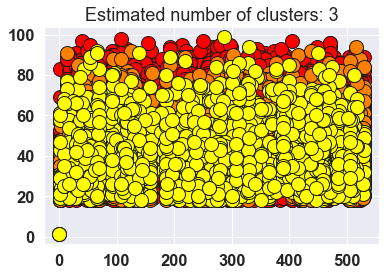

In [150]:
labels_true = df_acp.iloc[:,0]
X = StandardScaler().fit_transform(df_acp)

print('Estimated number of clusters: %d' % n_clusters_)
#print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true,clusters2))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true,clusters2))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true,clusters2))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, clusters2))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true,clusters2,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, clusters2))

# Black removed and is used for noise instead.
unique_labels = set(clusters2)
colors = [plt.cm.autumn(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clusters2 == k)
    cluster_center = cluster_centers[k]

    xy = df_acp[class_member_mask]
    plt.plot(xy.iloc[:, 2], xy.iloc[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.savefig('graficomeanshift', dpi=500, transparent=True, bbox_inches='tight')
plt.show()

**Observamos que hay un cluster que es mayoritario y los otros minoritarios**